In [13]:
import pickle
import torch
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [70]:
with open(f"Results/Toy-NECOM-lpless_1_next_try/Toy-NECOM-lpless_1_next_try_6500.pkl", 'rb') as f:
       env = pickle.load(f)

with open(f"Results/Toy-NECOM-lpless_1_next_try/observations_6500.pkl", 'rb') as f:
       batch_obs = pickle.load(f)

with open(f"Results/Toy-NECOM-lpless_1_next_try/actions_4000.pkl", 'rb') as f:
       batch_acts = pickle.load(f)

<AxesSubplot:>

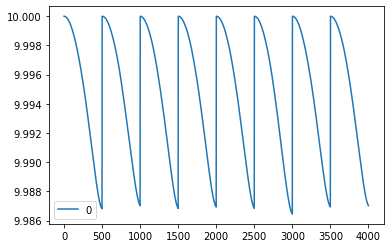

In [73]:
pd.DataFrame(batch_obs["agent1"].numpy()[:,2]).plot()

<AxesSubplot:>

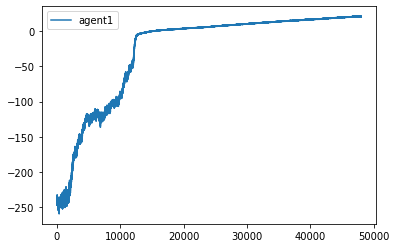

In [41]:
pd.DataFrame(env.rewards).plot()

In [5]:
obs_tens=torch.rand(1000,4)
obs_tens*=100
obs_tens[:,-1]=50
agent1=env.agents[0]

In [6]:
fluxes=torch.matmul(agent1.actor_network_(obs_tens),agent1.model.nullspace).detach().numpy()

In [7]:
obs_df=pd.DataFrame(obs_tens.detach().numpy(),columns=["agent1","Glc","Starch","time"])

In [8]:
fluxes_df=pd.DataFrame(fluxes,columns=[i.id for i in agent1.model.reactions])

In [9]:
full_table=pd.concat([obs_df,fluxes_df],axis=1)

In [10]:
fig = go.Figure(data=[go.Scatter3d(x=full_table["agent1"], y=full_table["Starch"], z=full_table["Amylase_Prod"],
                                   mode='markers',
                                   marker=dict(
                                    size=2,
                                    color=full_table["Amylase_e"],                # set color to an array/list of desired values
                                    colorscale='Viridis',   # choose a colorscale
                                    opacity=0.8))])
fig.show()

In [5]:
pd.DataFrame(env.rewards)


,agent1,agent2,agent3,agent4,agent5,agent6,agent7,agent8,agent9,agent10
0,-258.884216,-226.918304,-211.860596,-265.005920,-265.039581,-287.761414,-255.313889,-239.687500,-335.204285,-176.448685
1,-258.219727,-231.633453,-216.030212,-272.073639,-260.881531,-281.321899,-252.448608,-240.105927,-337.072510,-173.797470
2,-263.498108,-229.612106,-212.388855,-266.487000,-263.134705,-280.932190,-255.888046,-241.303894,-335.383240,-173.448746
3,-258.315918,-232.026855,-215.328568,-262.721802,-266.126740,-286.096344,-256.385010,-243.254730,-337.043884,-178.183258
4,-261.524811,-232.143661,-214.577698,-262.060394,-263.237305,-280.929047,-254.442413,-239.767334,-334.660095,-180.833939
...,...,...,...,...,...,...,...,...,...,...
40003,1.627617,-31.734884,1.711647,4.831698,0.384547,5.090257,0.452258,3.395182,5.007393,4.036202
40004,1.777372,-30.876827,1.968358,4.872505,0.426656,4.173848,0.379497,3.224725,4.932911,3.930723
40005,0.729205,-39.337700,1.424840,4.278592,-0.678545,4.300140,-0.491240,3.235724,4.855735,3.789253
40006,0.902273,-36.819916,1.516116,4.600029,-0.381110,4.235539,0.282941,3.153435,4.950660,3.672873
